# Lab 2: Group 3 (Conrad, Connor, Keagan, and Matt M.)
#Introduction

##What outliers are:

An Outlier is defined as "an observation that lies an abnormal distance from other values in a random sample from a population"

- An outlier is an obeservation in a set of data that is of considerable dissimilarity or inconsistency with the remainder of the data
  
- Outliers must be indentified as they interfere with the data analysis process
  
- The removal of outliers also creates a survivorship bias; meaning useful information could be found within patterns that the small patterns create
  

##Methods of Determining Outliers

- Peirce's Criterion
  
  - Peirce's Criterion is expressed as a ratio between the allowable deviation and the sample set's mean: $R=\frac{|X_i - X_m|_{max}}{\sigma}$
- Steps for applying Peirce's Criterion (Stephanie Glen)
  
  1. Find the mean and the sample standard deviation for the entire set
    
  2. Look up the value of R in a Peirce’s table that corresponds to the number of observations in your sample set. Begin by assuming one outlier, although you may repeat the process to discover more than one.
    
  3. Use the formula $|X_i - X_m | _{max}=\sigma$ to calculate the maximum allowable deviation.
    
  4. Calculate the actual deviation of your potential outliers. $|X_i – X_m|$
    
  5. Check if $|X_i – X_m| > |X_i - X_m|_{max}$, and if it is, eliminate that outlier.
    
  6. Now assume two outliers, and go through step 2-5 again. Keep the original number of measurements as well as the original values of the standard deviation and mean.
    
  7. If your calculations in step 6 give you another outlier, you can repeat the process. Assume an additional outlier each time through and use the original number of measurements, mean and standard deviation each time.
    
  8. Once all questionable data has been tested, calculate the mean and standard deviation again for your final data set.
    
- Box plots and Interquartile range (NIST)
  
  - Box plots with fences: A box plot is constructed by drawing a box between the upper($Q_1$ or top 25%) and lower ($Q_3$ or lower 25%) quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:
    
  - lower inner fence: $Q_1 - 1.5*IQ$
    
  - upper inner fence: $Q_3 + 1.5*IQ$
    
  - lower outer fence: $Q_1 - 3*IQ$
    
  - upper outer fence: $Q_3 + 3*IQ$
    
  - Outlier detection criteria: A point beyond an inner fence on either side is considered a mild outlier. A point beyond an outer fence is considered an extreme outlier.
    

##Comparison of Outlier Methods

Peirce’s criterion has a few benefits and drawbacks when compared to the boxplot/IQR method. One comparison is that the IQR method is seemingly simpler than Peirce’s criterion. The IQR method takes only a few quick calculations to see if a point is an outlier, whereas using Peirce’s criterion takes a bit more computation and the use of the tables. However, the use of fences in the IQR method isn’t probably as reliable as Peirce’s criterion. The fences are somewhat arbitrary, which can make outlier identification interesting. Other major benefits to using Peirce’s criterion over the IQR method are that Peirce’s criterion is applicable in most situations, and it doesn’t make any assumptions about the data when making rejections. While fences in the IQR method isn’t necessarily making assumptions about the data, compared to Peirce’s criterion.

##Introduction to FLUXNET 2015

FLUXNET is the linked confederation of flux measurement sites in North, Central and South America, Europe, Asia, Africa, and Australia. The network is made up of meteorological sensors that measure atmospheric state variables, like temperature, humidity, wind speed, rainfall, and atmospheric carbon dioxide, continuously. These measurements provide inputs into models that predict weather, climate, and carbon and water cycles; this allows researchers to detect trends in climate, greenhouse gases and air pollution. The fluxes themselves are trace gases between land and the atmosphere and are measured in moles per unit area per unit time. Within a region, smaller networks target specific land types, such as urban areas and inland water systems. The flux network has the ability to detect emergent properties of ecosystems at local, regional, and global scales and quantify variablility in carbon, water and energy as spatial fluxes.


In [ ]:
install.packages('latex2exp')
library(latex2exp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# A.1 peirce_dev.R

peirce_crit <- function(N, n, m) 
{
  N = as.double(N)
  n = as.double(n)
  m = as.double(m)
  if(N > 1)
  {
       Q = (n ^ (n / N) * (N - n) ^ ((N - n) / N)) / N
       Rnew = 1.0
       Rold = 0.0
       while(abs(Rnew - Rold) > (N * 2.0e-16))
       {
           ldiv = Rnew ^ n
           if (ldiv == 0) 
           {
              ldiv = 1.0e-6
           }
           Lamda = ((Q ^ N) / (ldiv)) ^ (1.0 / (N - n))
           x2 = 1.0 + (N - m - n) / n * (1.0 - Lamda ^ 2.0)
           if (x2 < 0) 
           {
              x2 = 0
              Rold = Rnew
           } 
           else 
           {
              Rold = Rnew
              Rnew = exp((x2 - 1) / 2.0) * (2 * pnorm(sqrt(x2)/sqrt(2) * sqrt(2), lower = FALSE))
           }
       }
    } 
    else 
    {
       x2 = 0
    }
    return(x2)
}

In [ ]:
# A.2 outlier.py 
find_outliers <- function(nee, nee_fit, nparam, mse){
  # Set Values for Peirce relevant info
  peirce_max_n <- length(nee)
  peirce_rm_n <- 1
  peirce_unknown <- nparam
  
  # Get the square errors
  se <- (nee - nee_fit) ^ 2.0
  
  # Calculate Peirce's Criterion
  ## Tolerance (d2)
  peirce_x2 <- peirce_crit(peirce_max_n, peirce_rm_n, peirce_unknown)  
  peirce_d2 <- peirce_x2 * mse
  
  # Identify the instances of outliers 
  outlier_index <- which(se > peirce_d2)
  outlier_found <- length(outlier_index) 
  
  # Run to test if any outlier is not found
  if (outlier_found == 0){
    peirce_rm_n <- 2

    peirce_x2 <- peirce_crit(peirce_max_n, peirce_rm_n, peirce_unknown)
    peirce_d2 <- peirce_x2 * mse

    outlier_index <- which(se > peirce_d2)
    outlier_found <- length(outlier_index) 
  
    # Reset Number of outliers to be removed 
    peirce_rm_n <- 1
  }
  
  # Increase number of outliers to be removed until it is greater than outliers found
  while(peirce_rm_n <= outlier_found){
    peirce_rm_n <- peirce_rm_n + 1

    peirce_x2 <- peirce_crit(peirce_max_n, peirce_rm_n, peirce_unknown)
    peirce_d2 <- peirce_x2 * mse
    
    outlier_index <- which(se > peirce_d2)
    outlier_found <- length(outlier_index)
    }
  return(outlier_index)
}

In [ ]:
flux.url <- "https://ds-wm.github.io/course/atsa/data/FLX_US-Goo_FLUXNET2015_SUBSET_HH_2002-05_1-4.csv"
df <- read.csv(flux.url)

#  (Y ~ X)
lin.mod <- lm(df$NEE_VUT_REF ~ df$SW_IN_F)
res <- lin.mod$residuals

outliers <- find_outliers(df$NEE_VUT_REF, fitted(lin.mod), 2, mean(res ^ 2))
cat('Total Number of Outliers: ', length(outliers))

Total Number of Outliers:  47

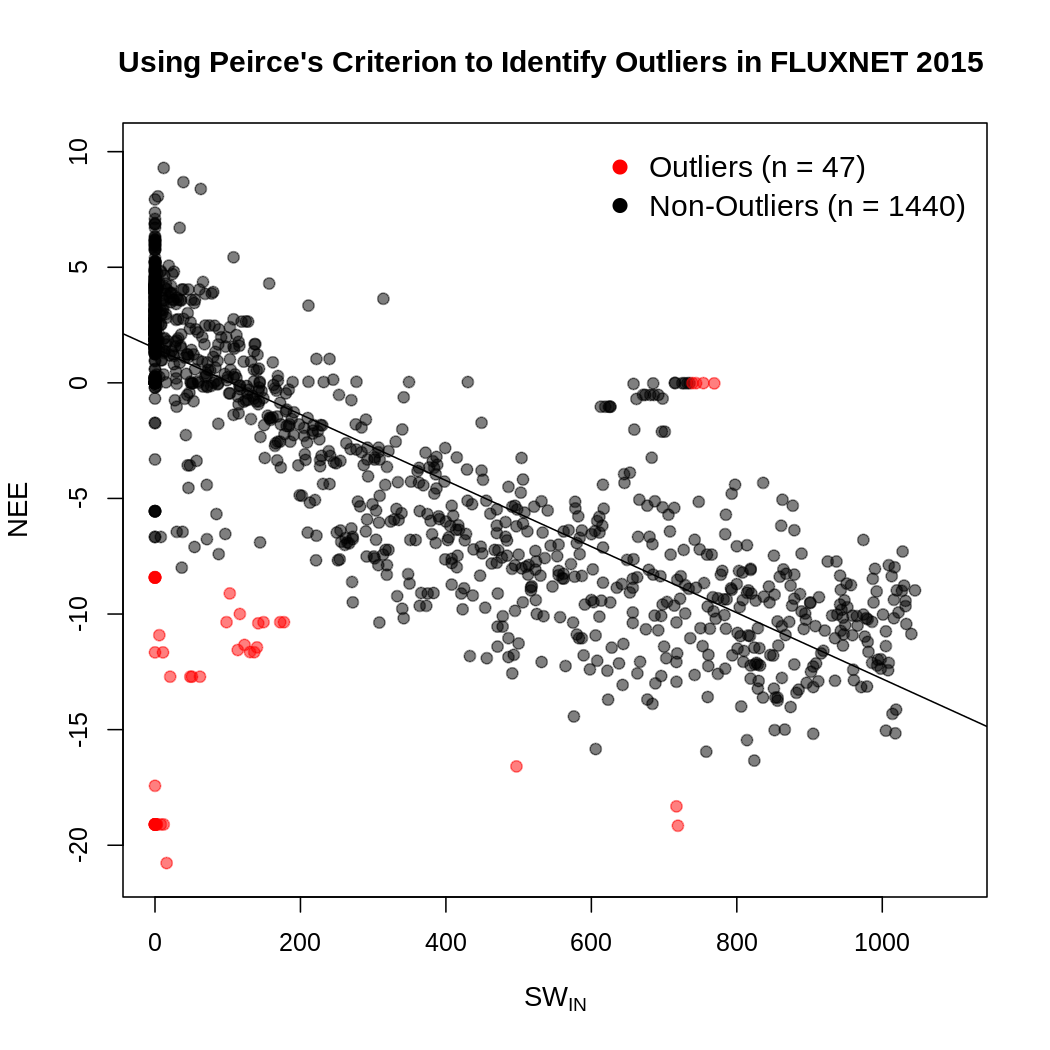

In [ ]:
v <- 1:length(df$SW_IN_F)
mask <- !(v %in% outliers)

#Scatter plot
options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 150)

plot(
  pch = 19,
  col = rgb(red = 0, green = 0, blue = 0, alpha = 0.5),
  df$SW_IN_F[mask], #independent variable
  df$NEE_VUT_REF[mask], #dependent variable
  xlim = c(0, 1100), ylim = c(-21, 10),
  main = "Using Peirce's Criterion to Identify Outliers in FLUXNET 2015 ",
  xlab = TeX("SW_{IN}"), ylab = "NEE",
  cex = 1, cex.lab = 1.1, cex.main = 1.2
)

points(
  pch = 19,
  df$SW_IN_F[outliers],
  df$NEE_VUT_REF[outliers], 
  col = rgb(red = 1, green = 0, blue = 0, alpha = 0.5)
)

abline(lin.mod)

legend(x = 600, y = 11,
  legend = c("Outliers (n = 47)","Non-Outliers (n = 1440)"),
  pch = 19, col = c("red","black"), cex = 1.2,
  bty = 'n'
)

## Conclusion and Discusion

To identify doubtful observations based on the relationship between net ecosystem exchange (NEE) and incoming shortwave radiation (SWin) our group began by using the GePiSaT documentation and Pierce’s criterion Wikipedia page as a guide to build two utility functions. The two functions, peirce_crit() and find_outliers(), were translated from Python to R. The Python code was included in the GePiSaT documentation.

The first function, peirce_crit(), computes Peirce’s threshold error and the second function, find_outliers(), uses peirce_crit() to determine which elements of a vector should be classified as an outlier. In the GePiSaT documentation the original find_outliers() function removed the outliers from the dataset. In our implementation the function returns the index of each outlier. This change allows us to create a vector that only contains outliers which is useful when trying to distinguish the two sets of points on a scatter plot

The most challenging part of Lab 2 was creating the second function, find_outliers(). ______ _________________________________________________________________.

Using the two utility functions we found that there were 47 outliers out of a total of 1487 data points.
Peirce’s criterion does not have an expected number of outliers but instead seeks out points that are not representative of a general trend defined by a linear model. By looking at the plot the points highlighted as outliers are clearly not in line with the linear model. The results are as expected. Interestingly, the top right corner of the plot contains a cluster of points with only half being considered outliers. The cluster shows clearly where Peirce’s threshold error lies.

In general, there is a negative trend between net ecosystem exchange (NEE) and incoming shortwave radiation (SWin). As the amount of energy received from the sun increases, the amount of carbon being absorbed from the atmosphere increases. The plot supports the theory that more energy from the sun supports vegetation which absorbs more carbon from the atmosphere.

##References

1. “About the FLUXNET Network.” FLUXNET. Lawrence Berkeley National Laboratory, July 9, 2020. https://fluxnet.org/about/. 

2. Renze, John. "Outlier." From MathWorld--A Wolfram Web Resource, created by Eric W. Weisstein. https://mathworld.wolfram.com/Outlier.html
  
3. Sridhar Ramaswamy, Rajeev Rastogi, and Kyuseok Shim. 2000. Efficient algorithms for mining outliers from large data sets. In <i>Proceedings of the 2000 ACM SIGMOD international conference on Management of data</i> (<i>SIGMOD '00</i>). Association for Computing Machinery, New York, NY, USA, 427–438. DOI:https://doi.org/10.1145/342009.335437

4. Stephanie Glen. "Pierce’s Criterion: Definition" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/pierces-criterion/
  
5. Yang, Shengping, and Gilbert Berdine. “View of Outliers: The Southwest Respiratory and Critical Care Chronicles.” View of Outliers | The Southwest Respiratory and Critical Care Chronicles, January 15, 2016. https://pulmonarychronicles.com/index.php/pulmonarychronicles/article/view/252/635. 
  
6. https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm#:~:text=Definition%20of%20outliers,what%20will%20be%20considered%20abnormal
